In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn
import matplotlib
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.style.use('ggplot')

In [169]:
bank=pd.read_csv('bank-full.csv',sep=';')

In [170]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [266]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45211 non-null  int64 
 1   job              45211 non-null  object
 2   marital          45211 non-null  object
 3   education        45211 non-null  object
 4   default          45211 non-null  object
 5   balance          45211 non-null  int64 
 6   housing          45211 non-null  object
 7   loan             45211 non-null  object
 8   contact          45211 non-null  object
 9   day              45211 non-null  int64 
 10  month            45211 non-null  object
 11  duration         45211 non-null  int64 
 12  campaign         45211 non-null  int64 
 13  pdays            45211 non-null  int64 
 14  previous         45211 non-null  int64 
 15  poutcome         45211 non-null  object
 16  y                45211 non-null  object
 17  predictedvalues  45211 non-null

In [171]:
# List of numerical variables
numerical_data = bank.select_dtypes(include="number")
numerical_data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


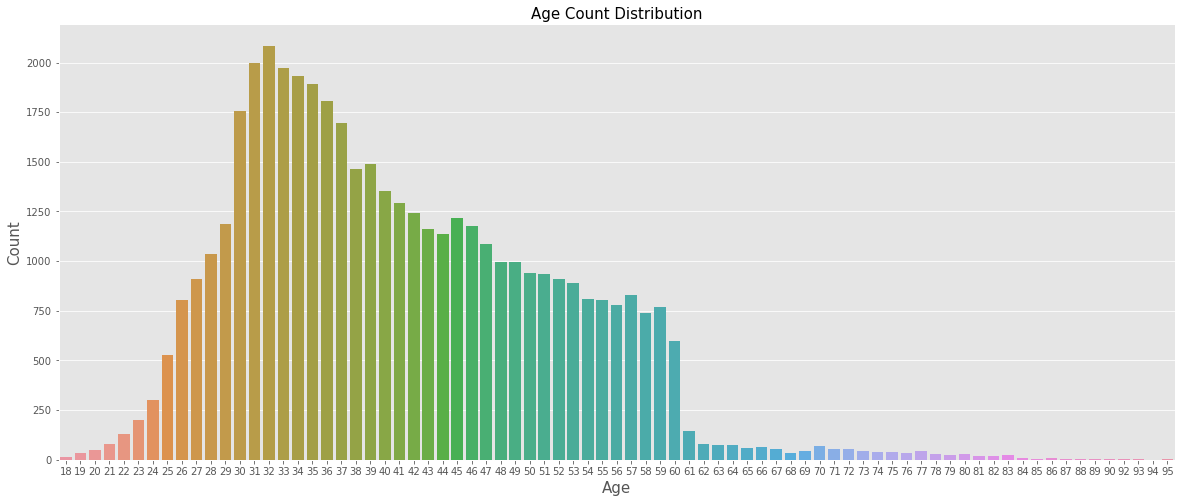

In [239]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [172]:
# List of categorical variables
categorical_data = bank.select_dtypes(exclude="number")

In [240]:
print('Numerber of outliers: ', bank[bank['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['age'] > 69.6]['age'].count()*100/len(bank),2), '%')

Numerber of outliers:  554
Number of clients:  45211
Outliers are: 1.23 %


In [173]:
categorical_data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

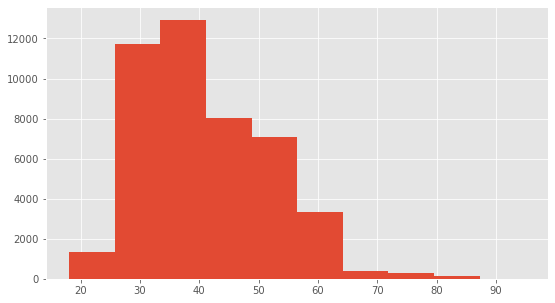

In [174]:
plt.hist(bank['age'],bins=10)

In [175]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [176]:
#while less than age of 48 are more than 75%

In [177]:
bank.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

Text(0.5, 1.0, 'Duration distribution')

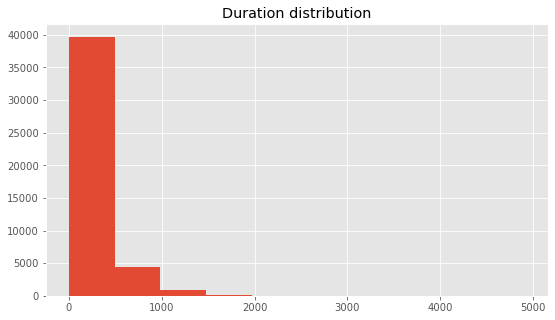

In [178]:
plt.hist(bank['duration'],bins=10)
plt.title("Duration distribution")

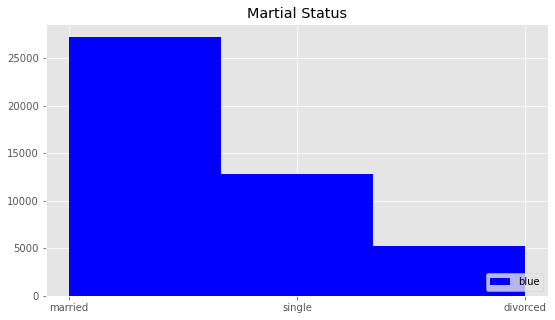

In [179]:
plt.hist(bank['marital'],bins=3,color='blue')
plt.title("Martial Status")
plt.legend(["blue","green","red"],loc="lower right")


<AxesSubplot:xlabel='duration', ylabel='campaign'>

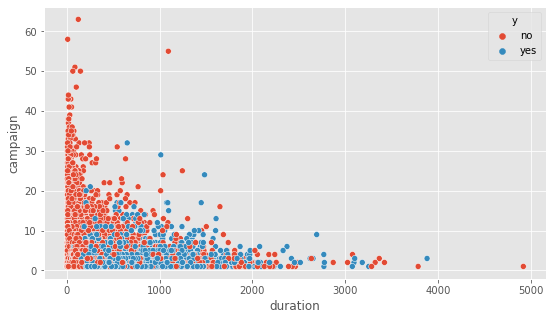

In [180]:
sns.scatterplot(data=bank,x='duration',y='campaign',hue='y')

In [181]:
bank["job"].value_counts()


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [182]:
bank["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

(array([39922.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5289.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

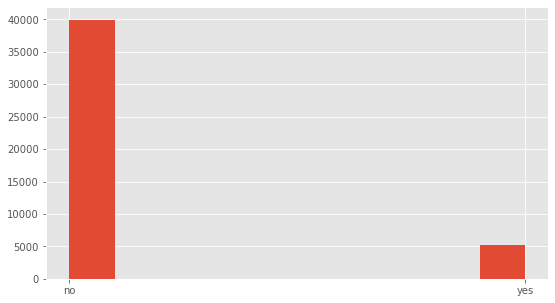

In [183]:
plt.hist(bank['y'],bins=10)


In [184]:
bank["y"].value_counts()
#more than 90% of the peopel didnt subscribed

no     39922
yes     5289
Name: y, dtype: int64

<AxesSubplot:title={'center':'Job and deposit'}>

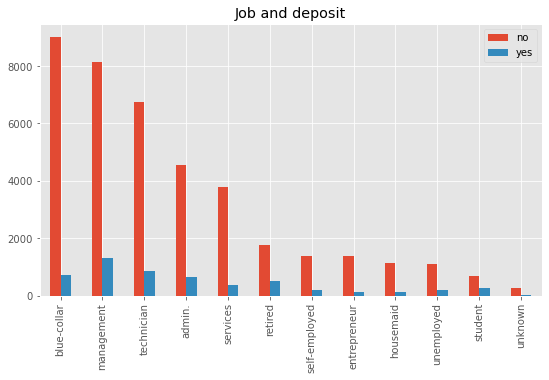

In [185]:
#categorical columms data exploration 
#various job holders who are subscribed
job_deposit = pd.DataFrame()

job_deposit['no'] = bank[bank['y'] == 'no']['job'].value_counts()

job_deposit['yes'] = bank[bank['y'] == 'yes']['job'].value_counts()

job_deposit.plot.bar(title = 'Job and deposit')

In [186]:
bank[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000
mean,40.197828,2.763841,0.580323
std,100.128746,3.098021,2.303441
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,63.000000,275.000000


<AxesSubplot:title={'center':'marital and deposit'}>

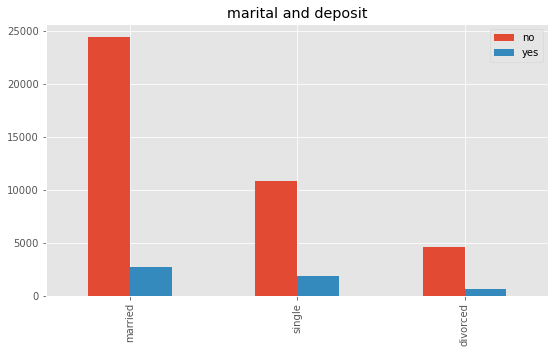

In [187]:
#martial and deposit
m_deposit = pd.DataFrame()

m_deposit['no'] = bank[bank['y'] == 'no']['marital'].value_counts()

m_deposit['yes'] = bank[bank['y'] == 'yes']['marital'].value_counts()

m_deposit.plot.bar(title = 'marital and deposit')

<AxesSubplot:title={'center':'Education and deposit'}>

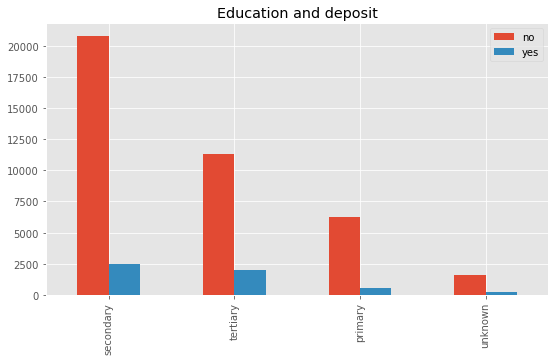

In [188]:
edu_deposit = pd.DataFrame()

edu_deposit['no'] = bank[bank['y'] == 'no']['education'].value_counts()

edu_deposit['yes'] = bank[bank['y'] == 'yes']['education'].value_counts()

edu_deposit.plot.bar(title = 'Education and deposit')

<AxesSubplot:title={'center':'contact and deposit'}>

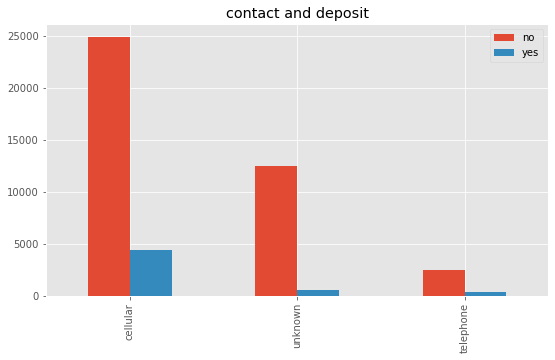

In [189]:
cont_deposit = pd.DataFrame()

cont_deposit['no'] = bank[bank['y'] == 'no']['contact'].value_counts()

cont_deposit['yes'] = bank[bank['y'] == 'yes']['contact'].value_counts()

cont_deposit.plot.bar(title = 'contact and deposit')

In [190]:
#numerical columns data exploration


In [191]:
#balance and deposit

balance_deposit = pd.DataFrame()
balance_deposit['balance_yes'] = (bank[bank['y'] == 'yes'][['y','balance']].describe())['balance']
balance_deposit['balance_no'] = (bank[bank['y'] == 'no'][['y','balance']].describe())['balance']

balance_deposit

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


In [192]:
x=bank.drop('y',axis=1)

In [193]:
x=pd.get_dummies(x)

In [194]:
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [195]:
y=bank[['y']]

In [196]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [197]:
from sklearn.model_selection import train_test_split

In [198]:
xtrain,xtest,ytrain,ytest=train_test_split(x,a,test_size=0.20)

In [199]:
from sklearn.ensemble import RandomForestClassifier 

In [200]:
lm=RandomForestClassifier()

In [201]:
lm.fit(xtrain,ytrain)

RandomForestClassifier()

In [202]:
predictedvalue=lm.predict(xtest)

In [203]:
from sklearn.metrics import confusion_matrix

In [204]:
rf=RandomForestClassifier(n_estimators=100)
model=rf.fit(xtrain,ytrain)
rf_test=model.predict(xtest)

Test Set results: 


Confusion matrix testing data : 



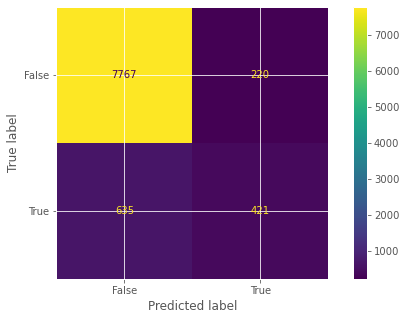

In [205]:
from sklearn import metrics
rf_matrix = confusion_matrix(ytest,rf_test)
print('Test Set results: \n\n')
print('Confusion matrix testing data : \n')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [206]:
confusion_matrix(ytest,rf_test)

array([[7767,  220],
       [ 635,  421]], dtype=int64)

In [207]:
from sklearn.metrics import recall_score

In [242]:
print(confusion_matrix(ytest, predictedvalue))

[[7782  205]
 [ 626  430]]


In [156]:
from sklearn.metrics import accuracy_score

In [243]:
print(round(accuracy_score(ytest, predictedvalue),2)*100)

91.0


In [157]:
accuracy_score(ytest,rf_test)

0.9099856242397435

In [250]:
from sklearn.ensemble import GradientBoostingClassifier
gbk=GradientBoostingClassifier()
gbk.fit(xtrain,ytrain)
gbkpred=gbk.predict(xtest)
print(confusion_matrix(ytest, gbkpred ))
print(round(accuracy_score(ytest, gbkpred),2)*100)

[[7772  215]
 [ 615  441]]
91.0


In [251]:
from sklearn.metrics import classification_report

In [252]:
print('RFC Reports\n',classification_report(ytest, predictedvalue))

RFC Reports
               precision    recall  f1-score   support

          no       0.93      0.97      0.95      7987
         yes       0.68      0.41      0.51      1056

    accuracy                           0.91      9043
   macro avg       0.80      0.69      0.73      9043
weighted avg       0.90      0.91      0.90      9043



In [253]:
print('gbk report\n',classification_report(ytest,gbkpred))

gbk report
               precision    recall  f1-score   support

          no       0.93      0.97      0.95      7987
         yes       0.67      0.42      0.52      1056

    accuracy                           0.91      9043
   macro avg       0.80      0.70      0.73      9043
weighted avg       0.90      0.91      0.90      9043



In [263]:
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid')
svc.fit(xtrain,ytrain)
svcpred=svc.predict(xtest)
print(confusion_matrix(ytest, svcpred))
print(round(accuracy_score(ytest, svcpred),2)*100)

[[7045  942]
 [ 936  120]]
79.0


In [265]:
print('SVC report\n',classification_report(ytest,svcpred))

SVC report
               precision    recall  f1-score   support

          no       0.88      0.88      0.88      7987
         yes       0.11      0.11      0.11      1056

    accuracy                           0.79      9043
   macro avg       0.50      0.50      0.50      9043
weighted avg       0.79      0.79      0.79      9043

